In [ ]:
#必要ライブラリにインポート
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame
import random as rd

#可視化ライブラリ
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%precision 3
#小数第3位まで表示

np.random.seed(0) #ランダムシードの固定

## **確率**

In [ ]:
#サイコロがとりうる値を配列に格納
dice_data = np.array([1,2,3,4,5,6])
dice_data

array([1, 2, 3, 4, 5, 6])

【事象】データの中からランダムな値を1つ取り出す

In [ ]:
print("ランダムな値を1つだけ抽出",np.random.choice(dice_data,1))

ランダムな値を1つだけ抽出 [6]


# 統計的確率
サイコロを1000回振るシミュレーション

In [ ]:
#サイコロを振る回数を指定
calc_steps = int(input("サイコロを振る回数を入力してください＞＞　"))

#１～６のデータから、指定回数分のデータの抽出を実施
dice_result = np.random.choice(dice_data,calc_steps)

#それぞれの目がどれくらいの割合でたか計算
for i in range(1,7):
  p = len(dice_result[dice_result == i]) / calc_steps
  print("{}が出る確率は{}%です".format(i,p))

サイコロを振る回数を入力してください＞＞　10000
1が出る確率は0.1669%です
2が出る確率は0.1714%です
3が出る確率は0.1601%です
4が出る確率は0.1706%です
5が出る確率は0.1645%です
6が出る確率は0.1665%です


# 練習問題

練習問題4-1

コインの表を0、裏を1として1000回投げた時の表裏それぞれが出る確率を計算する

In [ ]:
coin_data = np.array([0,1])

coin_result = np.random.choice(coin_data,1000000)

for i in range(0,2):
  c = len(coin_result[coin_result == i]) / 1000000
  print(i,"が出る確率は",c,"です。")

0 が出る確率は 0.500845 です。
1 が出る確率は 0.499155 です。


練習問題4-2

1000本のくじの中に、100本のあたりくじがあります。AくんとBくんが順にくじを引いて、２人とも当たる確率を求める。

In [ ]:
#条件設定
print("まずは、条件設定")
kuji_num = int(input("くじの総数を決めてください。＞＞　"))
atari_kuji = int(input("あたりくじの本数を決めてください。＞＞"))

#計算過程
A = atari_kuji / kuji_num
print("Aくんが当たる確率は、",A)
kuji_num = kuji_num - 1
atari_kuji = atari_kuji - 1
B = atari_kuji / kuji_num
print("Bくんが当たる確率は、",B)
print("よって求める確率は、",A*B)

まずは、条件設定
くじの総数を決めてください。＞＞　1000
あたりくじの本数を決めてください。＞＞100
Aくんが当たる確率は、 0.1
Bくんが当たる確率は、 0.0990990990990991
よって求める確率は、 0.009909909909909911


練習問題4-3

日本国内で病気（X）になっている人は0.1%　検査方法は次の通り。


*   その病気の人がその検査を受けると99%は陽性反応
*   その病気でない人がその検査を受けると3%が陽性反応（誤診）

日本に住んでいる人がこの検査を受けた時、陽性反応を示しました。この人が病気である確率は何％でしょうか。



In [ ]:
#日本人が検査を受けて、陽性反応が出る確率
P = 0.001*0.99 + 0.03*(1-0.001)

#その人が病気で、陽性反応が出る確率
P_puls = 0.001*0.99

print("求める確率は",P_puls / P *100,"%")

求める確率は 3.1976744186046515 %


## 確率変数と確率分布

一様分布のグラフ化（サイコロの出る目）

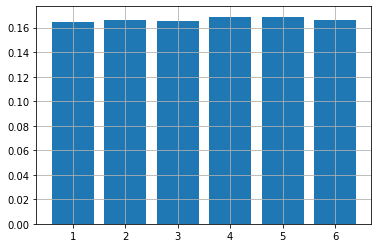

In [ ]:
#サイコロを1000回振る
calc_steps = 1000

#サイコロの出る目のデータから1000回の抽出を実施
#dice_rollsの中に1000個の要素を格納する
dice_rolls = np.random.choice(dice_data,calc_steps)

#それぞれの数字がどれくらいの割合で出たか計算

#空の配列を用意
prob_data = np.array([])
for i in range(1,7):
  #len()にて、dice_rollsの配列の中でi値の数を数えている
  p = len(dice_rolls[dice_rolls==i])/calc_steps
  #np.append(追加先の配列,追加する要素)
  prob_data = np.append(prob_data,p)

plt.bar(dice_data,prob_data)
plt.grid(True)

ベルヌーイ分布

[0.519 0.481]


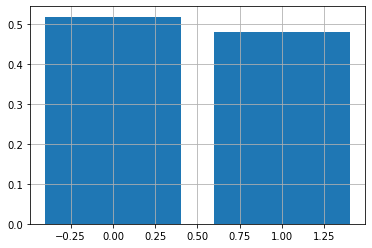

In [ ]:
#結果が２種類しかない試行・・・ベルヌーイ試行（例えば、コインの表裏）
coin_data = np.array([0,1])
calc_steps = 1000

coin_result = np.random.choice(coin_data,calc_steps)

data = np.array([])
for i in range(0,2):
  p = len(coin_result[coin_result==i])/calc_steps
  data = np.append(data,p)

print(data)
plt.bar(coin_data,data)
plt.grid(True)


二項分布

ベルヌーイ試行をn回繰り返す

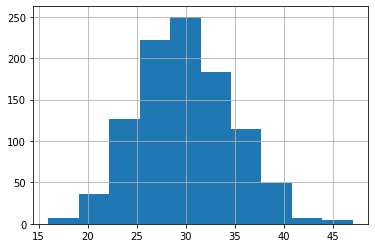

In [ ]:
np.random.seed(0)
#引数：試行回数(n)、確率(p)、サンプル数
x = np.random.binomial(100,0.3,1000)

plt.hist(x)
plt.grid(True)

# ポアソン分布

稀有な事象が発生するときの確率

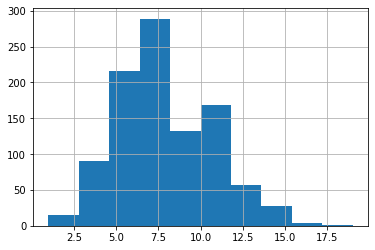

In [ ]:
y = np.random.poisson(8,1000)
plt.hist(y)
plt.grid(True)

#正規分布

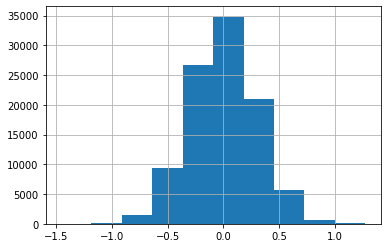

In [ ]:
#np.random.normal(平均,標準偏差,サンプル数)
x = np.random.normal(0,0.3,100000)
plt.hist(x)
plt.grid(True)

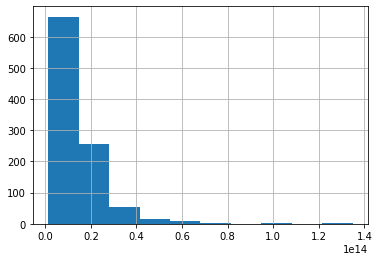

In [ ]:
#対数正規分布
x  = np.random.lognormal(30,0.7,1000)
plt.hist(x)
plt.grid(True)


#Practice

練習問題4-4

平均0、分散1の正規分布からn=100の標本抽出を10000回繰り返して、標本平均の標本分布を描く

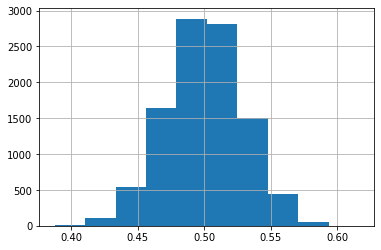

In [ ]:
np.random.seed(0)
#試行回数の設定
calc_steps = 10000
#標本平均格納用配列を生成
hist_data = np.array([])

for i in range(calc_steps):
#平均0、分散１の正規分布から100の乱数を生成する
#np.random.randn(列数、行数)
 sample = np.random.rand(100)
 X = np.mean(sample)
 #得られた標本平均を配列に格納
 hist_data = np.append(hist_data,X)

#ヒストグラムの描画
plt.hist(hist_data)
plt.grid(True)


平均0、分散1の対数正規分布からn=100の標本抽出を10000回繰り返して、標本平均の標本分布を描く

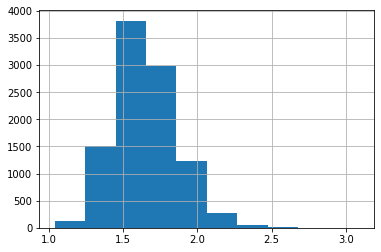

In [ ]:
calc_step = 10000
hist_data = ([])
for i in range(calc_steps):
 sample = np.random.lognormal(0,1,100)
 X = np.mean(sample)
 hist_data = np.append(hist_data,X)

plt.hist(hist_data)
plt.grid(True)

練習問題4-6

学生の数学成績データの一学期の成績G１のヒストグラムを描く

In [ ]:
#Chapter3のディレクトリに保存されている"student-mat.csv"をChapter4のディレクトリにコピーする
import shutil
#shutil.copy(コピー元のファイルパス,コピー先のディレクトリパス)
shutil.copy("/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter3/student-mat.csv","/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter4")

drive  sample_data


/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter4


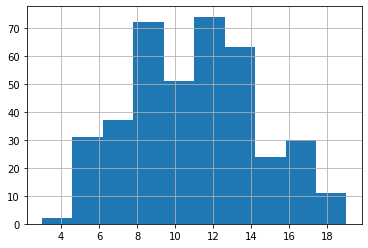

In [ ]:
%pwd
%cd "/content/drive/MyDrive/Colab Notebooks/東大_データサイエンティスト育成講座/Chapter4"

student_math_data = pd.read_csv("student-mat.csv",sep=";")
plt.hist(student_math_data["G1"])
plt.grid(True)

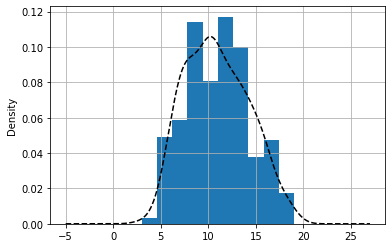

In [ ]:
#カーネル密度関数の描画
student_math_data.G1.plot(kind="kde",style="k--")
student_math_data.G1.hist(density=True)
plt.grid(True)

## 推計統計学

#大数の法則

試行を繰り返すと、その平均は期待値に近づいていくという法則

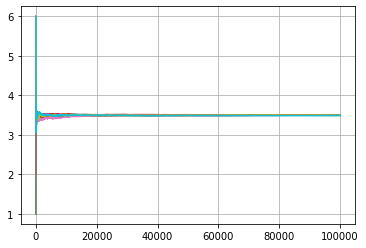

In [ ]:
#大数の法則の計算
#サイコロで実践

data_set = np.array([1,2,3,4,5,6])

#計算回数
calc_times = 100000

#グラフ描画のための連番を表示
number = np.arange(1,calc_times+1)

for i in range(10):
  p = np.random.choice(data_set,calc_times).cumsum() #cumsum()は累積和
  plt.plot(p/number)
  plt.grid(True)

#サイコロを振るごとに、出た目の平均値は期待値3.5に近づいている

## 中心極限定理

試行回数が増えるほど、標本平均が正規分布の形に近づく法則

In [ ]:
def function_central_theory(N):
  data_set = np.array([1,2,3,4,5,6])
  number = np.arange(1,N+1)

  mean_data = np.array([])

  #1000個のサンプルから標本平均を計算
  for i in range(1000):
    sample = np.random.choice(data_set,N).cumsum() #サイコロをN回振り、その累積和を計算。[N-1]番目がN回分の累積和
    mean_data = np.append(mean_data,sample[N-1]/N) #標本平均を計算し、mean_dataに格納
  
  plt.hist(mean_data)
  plt.grid(True)

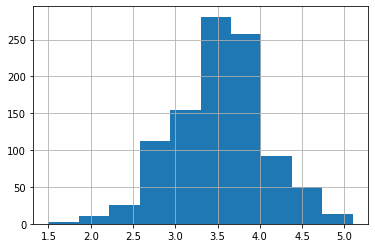

In [ ]:
#N=10

function_central_theory(10)

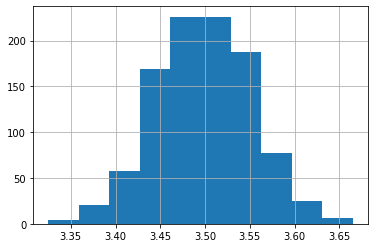

In [ ]:
#N=1000

function_central_theory(1000)

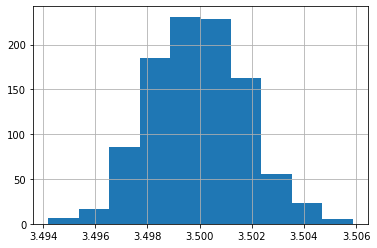

In [ ]:
#N=1000000

function_central_theory(1000000)